In [1]:
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.3/397.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


Lezione 11:

L'appoccio ad una serie storica, cioè come si applica una regressione ad una serie storica.
Le serie storiche hanno una loro formattazione a partire dalle date (cioè nel momento in cui si tira su un ds e la data diventa una componente importante dell'analisi, dobbiamo capire il layout in cui la serie storica descrive il dato temporale: es. età anagrafica espressa in giorni anzichè in anni).
Una delle proprietà è che la data mantenga la formattazione (%y-%m-&d).

Una serie storica (quando può essere predetta) ha un tipo di pattern (evento legato al tempo che si presenta con un pattern -e non con la forma- regolare).




fecha         y    exog_1    exog_2
0    1992-04-01  0.379808  0.958792  1.166029
1    1992-05-01  0.361801  0.951993  1.117859
2    1992-06-01  0.410534  0.952955  1.067942
3    1992-07-01  0.483389  0.958078  1.097376
4    1992-08-01  0.475463  0.956370  1.122199
..          ...       ...       ...       ...
190  2008-02-01  0.761822  1.515840  1.786373
191  2008-03-01  0.649435  1.506258  1.694264
192  2008-04-01  0.827887  1.505253  1.627135
193  2008-05-01  0.816255  1.491464  1.555068
194  2008-06-01  0.762137  1.459856  1.463507

[195 rows x 4 columns]

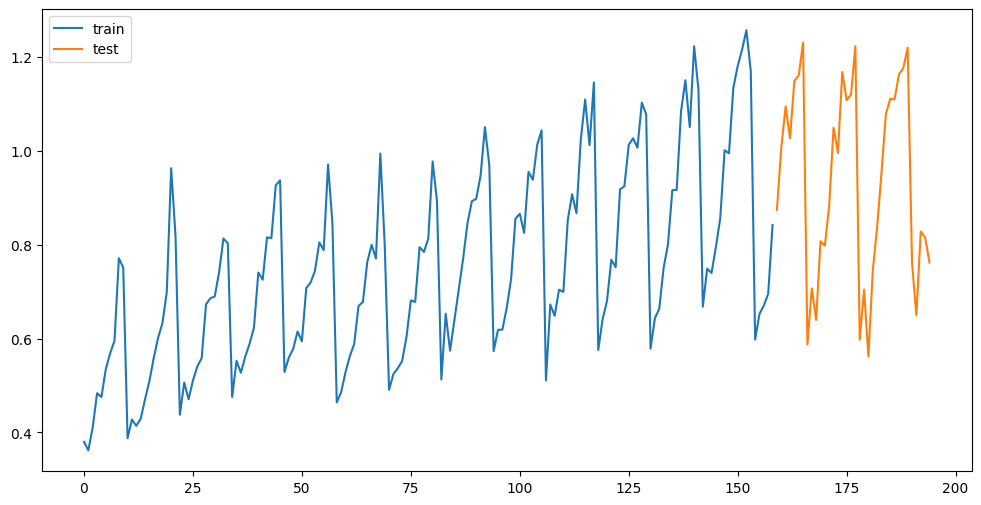

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv'
df = pd.read_csv(url, sep=',')
display(df)



f_train = df[:-36]
f_test  = df[-36:]

f_train_y = f_train['y']
f_test_y  = f_test['y']

# plot
fig, ax=plt.subplots(figsize=(12, 6))
f_train['y'].plot(ax=ax, label='train')
f_test['y'].plot(ax=ax, label='test')
ax.legend();
plt.show()

se prendo il patter e lo giro, è possibile studiare la frequenza attraverso le funzioni sinusoidali (diventa un modo per studiare più facilmente il pattern).

Forecasting:
Studiare i dati di una serie storica attraverso gli strumenti appresi fino ad ora.

  Documentazione:
    https://joaquinamatrodrigo.github.io/skforecast/0.4.3/quick-start/introduction-forecasting.html

Come viene affonrato il problema della predizione in una serie storica in un modello di machine learning classico: si utilizzano gli strumenti appresi fino ad ora (linear regression etc.).
Si è preferito mantenere la linear regression (per facilitare i calcoli) e si applicano altre metodi.

Come la progressione polinominale, si fa a trasformare il dataset: si crea una nuova matrice di dati a partire dal ds originale. Definendo il range in cui devo spezzare il ds di partenza (è possibile farlo perchè le serie storiche hanno un patter regolare).

In ogni caso si mantiene sempre lo stesso approccio sia che si tratti di un singolo target (single-set forecasting) sia che si tratti di multi-set forecasting).

Si crea un nuovo ds di partenza andandoci a ricavare le label dal ds stesso.
In questo caso non si ha più un ambiente di test in cui si hanno i valori da confrontare, ma si può testare internamente il modo in cui è stato splittato il ds.

Forecast-autoregression: regressione non a partire dai dati target, ma ricavandosi i dati target dal ds proprio.

Regressor e transformer sono due parametri importanti perchè introduco una nuova trasformazione dei dati.

Il modello impara dalla parte blu del grafico e fa una predizione sulla parte verde, ma sul lungo periodo tende a perdersi.

Ottimizzazione degli iperparametri: vale ciò che è stato detto per il discorso fatto per le linear regression.
Overfitting ed un underfitting: rimangono gli stessi. (sinusoide troppo regolare sulla predizione tende a scemare troppo presto non va troppo bene).